In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("Balaji Fast Food Sales.csv")
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Online,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
994,996,3/19/2023,Frankie,Fastfood,50,10,500,Online,Mrs.,Evening
995,997,9/20/2022,Sandwich,Fastfood,60,7,420,Online,Mr.,Evening
996,998,1/26/2023,Sandwich,Fastfood,60,13,780,Online,Mr.,Evening
997,999,8/27/2022,Panipuri,Fastfood,20,5,100,Online,Mrs.,Afternoon


In [8]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,7/3/2022,Aalopuri,Fastfood,20,13,260,Online,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2/3/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/2/2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [9]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [12]:
total_revenue = df['transaction_amount'].sum()
total_orders =df['order_id'].nunique()
print("Total Revenue:",total_revenue)
print("Total_orders:",total_orders)

Total Revenue: 275070
Total_orders: 999


In [13]:
daily_sales = df.groupby('date')['transaction_amount'].sum()
print("Highest Sales Day:")
print(daily_sales.idxmax(), daily_sales.max())
print("Lowest Sales Day:")
print(daily_sales.idxmin(), daily_sales.min())

Highest Sales Day:
2023-03-19 00:00:00 3350
Lowest Sales Day:
2022-09-23 00:00:00 20


In [15]:
top_items = df.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False).head(5)
top_items

item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Name: transaction_amount, dtype: int64

In [16]:
low_items = df.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False).head(5)
low_items

item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Name: transaction_amount, dtype: int64

In [18]:
time_sales = df.groupby('time_of_sale')['transaction_amount'].sum()
time_sales 

time_of_sale
Afternoon    56345
Evening      52355
Midnight     50725
Morning      53730
Night        61915
Name: transaction_amount, dtype: int64

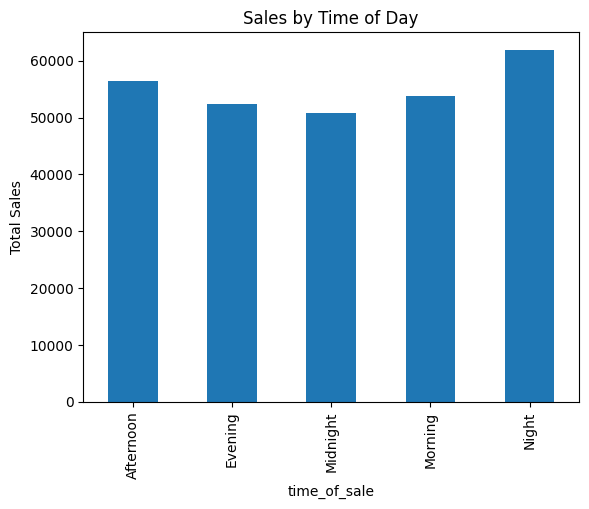

In [19]:
time_sales.plot(kind='bar', title='Sales by Time of Day')
plt.ylabel("Total Sales")
plt.show()

In [21]:
payment_dist = df['transaction_type'].value_counts()
payment_dist

transaction_type
Cash      532
Online    467
Name: count, dtype: int64

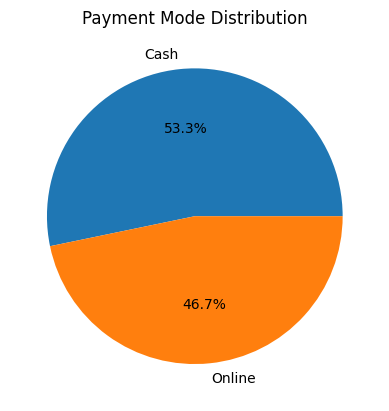

In [28]:
payment_dist.plot(kind='pie', autopct='%1.1f%%', title='Payment Mode Distribution')
plt.ylabel("")
plt.show()

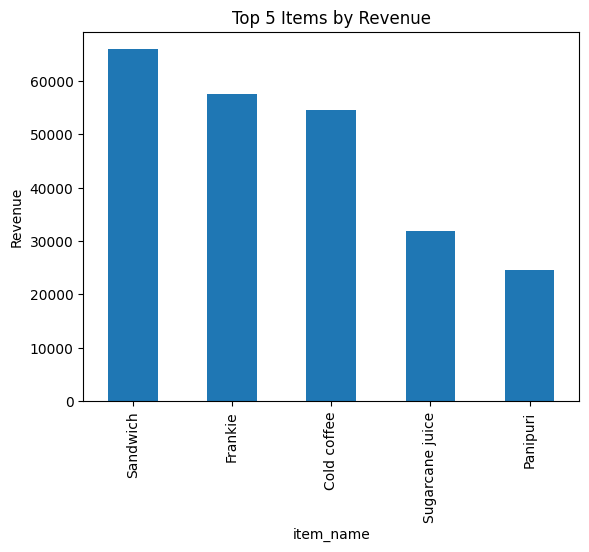

In [29]:
top_items.plot(kind='bar', title='Top 5 Items by Revenue')
plt.ylabel("Revenue")
plt.show()

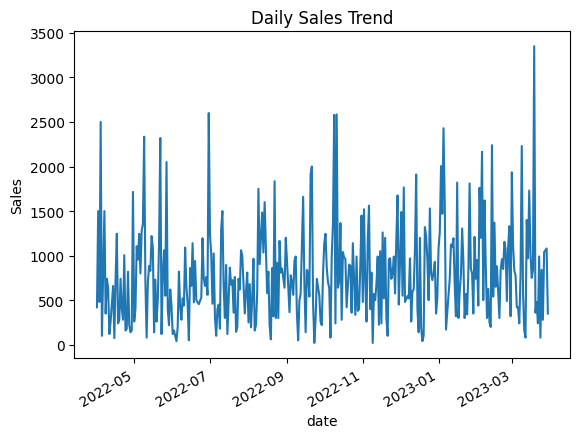

In [30]:
daily_sales.plot(kind='line', title='Daily Sales Trend')
plt.ylabel("Sales")
plt.show()

In [ ]:
Insights:

1.Evening time shows the highest sales, indicating peak customer activity.

2.UPI is the most preferred payment mode, showing digital adoption.

3.Certain items contribute very low revenue and need attention.